In [1]:
# to avoid overfitting and underfit and get perfect model following technique is useful
# 1. Regulerization -> in normal lr there are some coeff which responsible for how that feature is important and if any coeff value is too high as compare to other that means there will be overfitting due to that higher value , to decrease down those values we use regulerization, and there are 2 types of regul, l1 norm(mod) or lasso and l2 norm(square) ridge -> diff between them is basically about how values and how much value is decreasing.
# 2. Bagging
# 3. Boosting

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv("./datasets/methane_industry.csv", index_col='Section name')
df = df.drop(columns=['Unnamed: 1', 'Section'])
df = df.dropna()
df = df.T

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 23 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Agriculture, forestry and fishing                                                                                          29 non-null     object
 1   Mining and quarrying                                                                                                       29 non-null     object
 2   Manufacturing                                                                                                              29 non-null     object
 3   Electricity, gas, steam and air conditioning supply                                                                        29 non-null   

In [148]:
df.head()

Section name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,Information and communication,...,Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure,"Land use, land use change and forestry (LULUCF)",Total CH4 emissions
1990,"30,330.2","24,164.3",502.8,"9,869.5","64,272.1",57.8,77.1,334.5,12.6,9.4,...,21.0,38.3,16.1,18.6,8.9,6.7,1.1,"2,751.4",17.0,"132,533.8"
1991,"29,978.6","24,663.1",495.4,"9,713.8","64,900.2",56.5,77.6,334.0,13.2,9.4,...,21.0,38.0,16.7,19.0,8.9,6.8,1.1,"2,886.4",19.4,"133,284.1"
1992,"29,965.9","24,491.1",507.4,"9,589.2","65,077.8",55.2,75.6,332.0,12.7,9.2,...,20.4,39.1,16.9,19.8,7.9,6.6,1.1,"2,691.9",15.0,"132,959.1"
1993,"29,806.7","22,791.2",490.8,"9,258.3","65,635.2",53.6,72.5,329.5,12.7,8.8,...,19.6,38.7,14.4,18.7,8.0,6.4,1.1,"2,780.3",16.2,"131,385.9"
1994,"29,903.3","15,861.1",508.5,"8,982.6","66,150.2",52.8,70.3,328.5,12.4,8.4,...,18.8,29.5,13.0,18.6,7.6,6.1,1.1,"2,479.0",15.8,"124,489.8"


In [149]:
# int(df.iloc[0][0].replace(',','').split('.')[0])

In [150]:
for col in df.columns:
    df[col] = df[col].apply(lambda x : int(x.replace(',','').split('.')[0]))

In [151]:
df.sample(5)

Section name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,Information and communication,...,Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure,"Land use, land use change and forestry (LULUCF)",Total CH4 emissions
1991,29978,24663,495,9713,64900,56,77,334,13,9,...,21,38,16,19,8,6,1,2886,19,133284
2001,27171,8909,254,5986,59193,36,42,277,11,4,...,10,17,10,13,4,4,0,1675,32,103669
1993,29806,22791,490,9258,65635,53,72,329,12,8,...,19,38,14,18,8,6,1,2780,16,131385
2002,26693,8553,253,5783,58008,34,38,275,10,3,...,8,16,8,10,4,3,0,1483,32,101231
2017,25714,1810,221,3738,18453,30,17,120,8,1,...,3,5,6,9,1,1,0,1388,32,51568


In [152]:
df.corr()['Total CH4 emissions'].reset_index().sort_values(by='Total CH4 emissions', ascending=False)

,Section name,Total CH4 emissions
22,Total CH4 emissions,1.000000
4,"Water supply; sewerage, waste management and r...",0.978992
18,Other service activities,0.965176
17,"Arts, entertainment and recreation",0.964987
8,Accommodation and food services,0.958639
6,Wholesale and retail trade; repair of motor ve...,0.957914
7,Transport and storage,0.957003
15,Education,0.955532
0,"Agriculture, forestry and fishing",0.955144
3,"Electricity, gas, steam and air conditioning s...",0.950388


<Axes: xlabel='Section name', ylabel='Section name'>

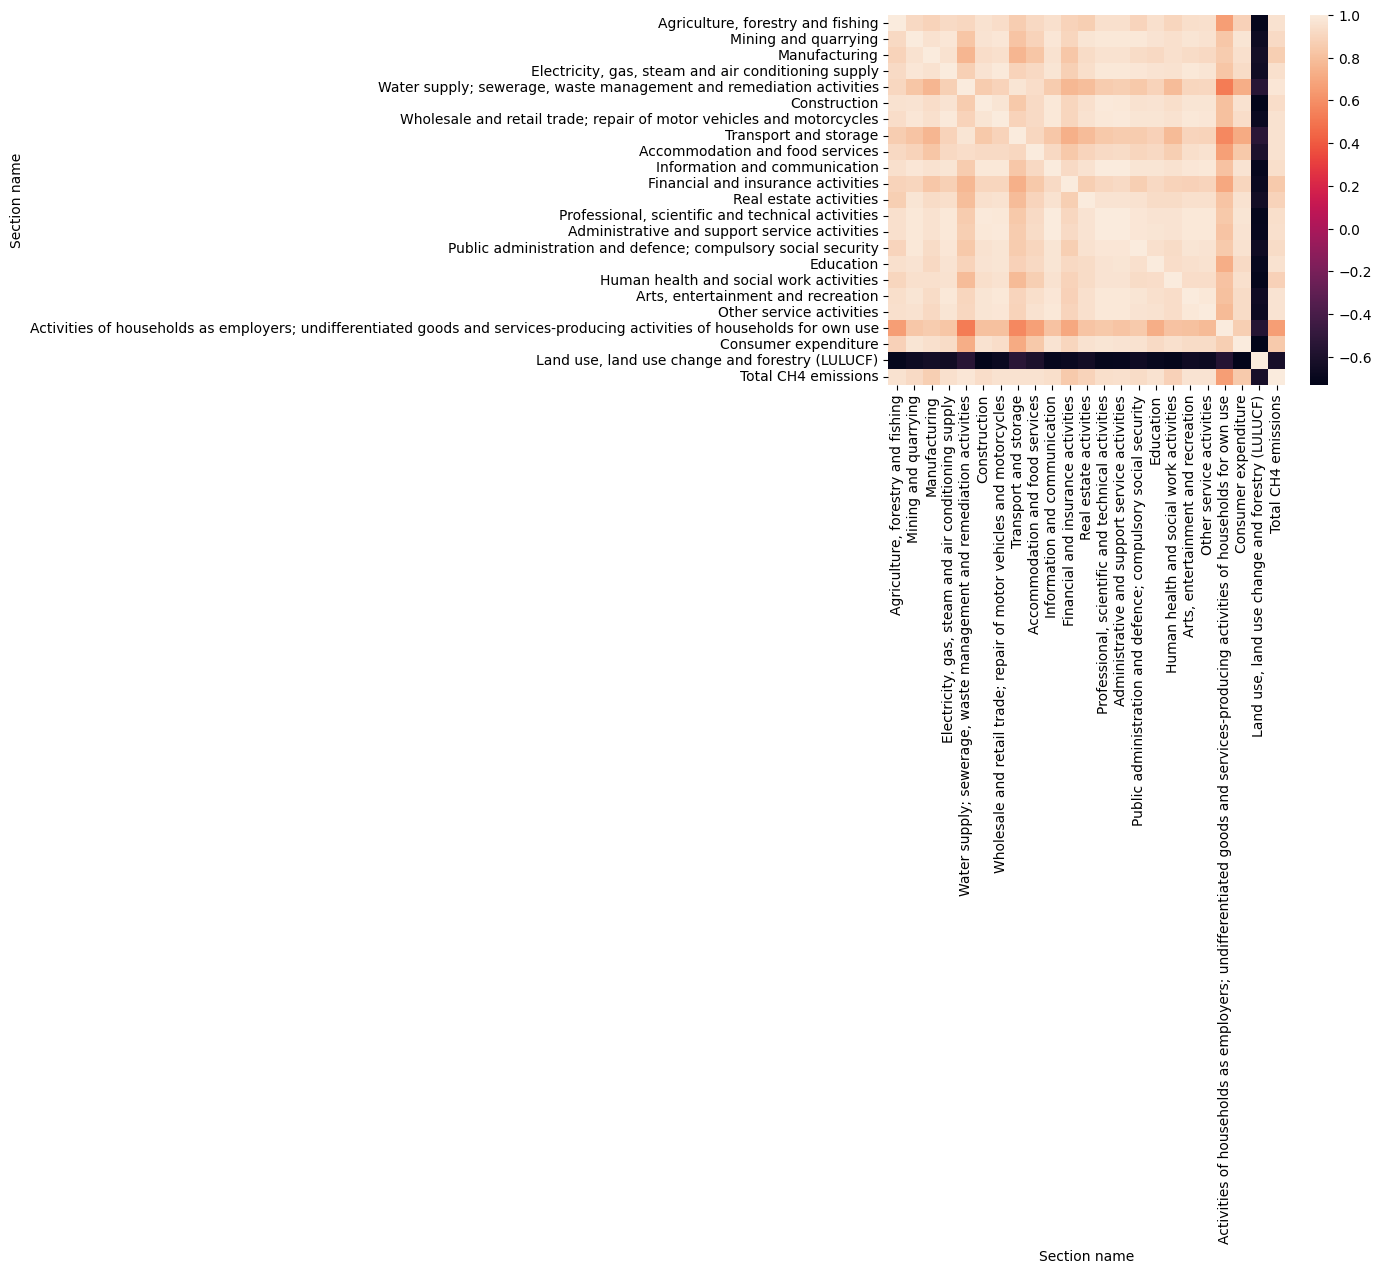

In [153]:
sns.heatmap(df.corr())

In [154]:
# Uni varient Analysis
# Total Emission

In [157]:
df.columns = ['agriculture','mining', 'manufacturing', 'electricity', 'watersupply', 'construction', 'wholesale', 
              'transport', 'foodservices', 'information', 'financial', 'realestate', 'professional', 'administrative', 
              'defence', 'eduction', 
              'heath', 'arts', 'other', 'activities', 'consumer', 'lulucf', 'ch4emission']

In [4]:
# df.to_csv('ch4emission.csv', index_label='year')
df = pd.read_csv('datasets/ch4emission.csv', index_col='year')

In [5]:
df.sample(5)

,agriculture,mining,manufacturing,electricity,watersupply,construction,wholesale,transport,foodservices,information,...,administrative,defence,eduction,heath,arts,other,activities,consumer,lulucf,ch4emission
year,,,,,,,,,,,,,,,,,,,,,
2018,25414,1919,203,3618,18721,31,16,98,8,1,...,3,5,6,9,1,1,0,1446,34,51547
2003,26905,7237,296,5528,54263,32,36,271,11,3,...,7,15,8,9,4,3,0,1403,60,96109
2001,27171,8909,254,5986,59193,36,42,277,11,4,...,10,17,10,13,4,4,0,1675,32,103669
1990,30330,24164,502,9869,64272,57,77,334,12,9,...,21,38,16,18,8,6,1,2751,17,132533
2015,25624,2589,222,3904,18814,25,19,97,8,1,...,3,5,5,9,1,1,0,1351,24,52716


In [6]:
cols = ['agriculture', 'mining', 'electricity','ch4emission']

<Axes: xlabel='year'>

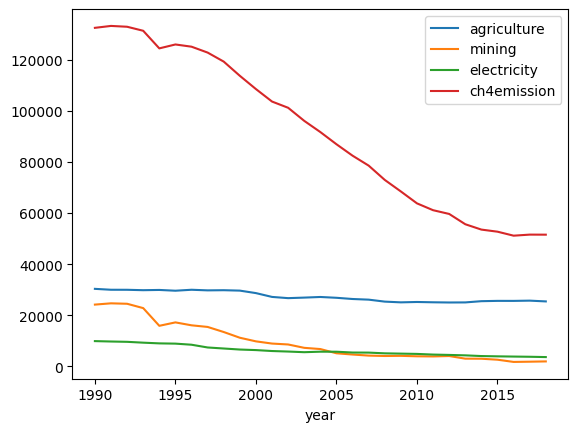

In [7]:
df[cols].plot(kind='line')

<Axes: xlabel='mining', ylabel='ch4emission'>

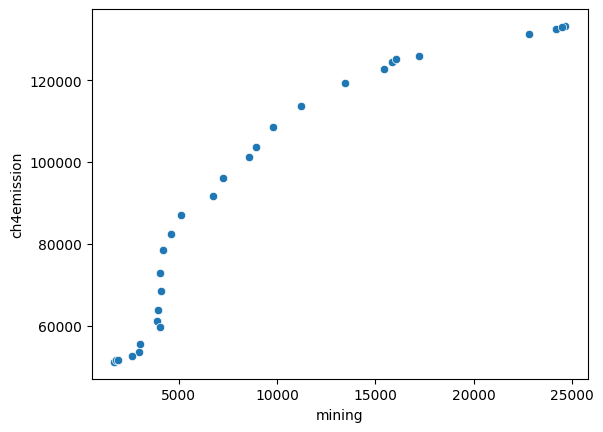

In [8]:
sns.scatterplot(y=df['ch4emission'], x=df['mining'])

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [10]:
lr = LinearRegression()
lr.fit(df['mining'].values.reshape(-1,1), df['ch4emission'])

LinearRegression()

In [11]:
r2_score(lr.predict(df['mining'].values.reshape(-1,1)), df['ch4emission'])

0.8290374860932884

In [12]:
poly_pipe = Pipeline([
    ("polynomial feature", PolynomialFeatures(degree=3)),
    ("minmax scaler", MinMaxScaler()),
    ("lr", LinearRegression())
])

In [13]:
poly_pipe.fit(df['mining'].values.reshape(-1,1), df['ch4emission'])
r2_score(poly_pipe.predict(df['mining'].values.reshape(-1,1)), df['ch4emission'])

0.9805896711423181

In [14]:
y_pred = poly_pipe.predict(df['mining'].values.reshape(-1,1))

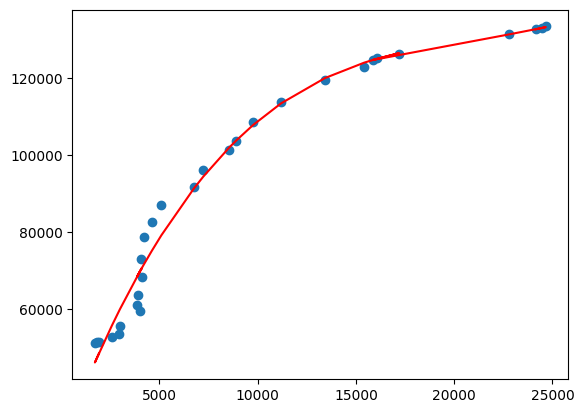

In [15]:
plt.scatter(x=df['mining'], y=df['ch4emission'])
plt.plot(df['mining'], y_pred, c='r')

<Axes: xlabel='year'>

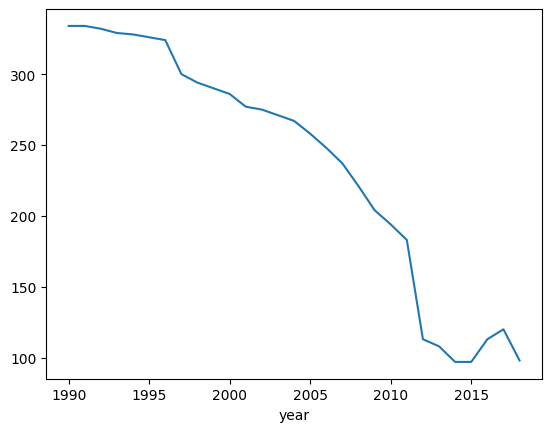

In [16]:
df['transport'].plot(kind='line', x='year')

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=1)

In [19]:
X = df.drop(columns=['ch4emission']).values
y = df['ch4emission'].values

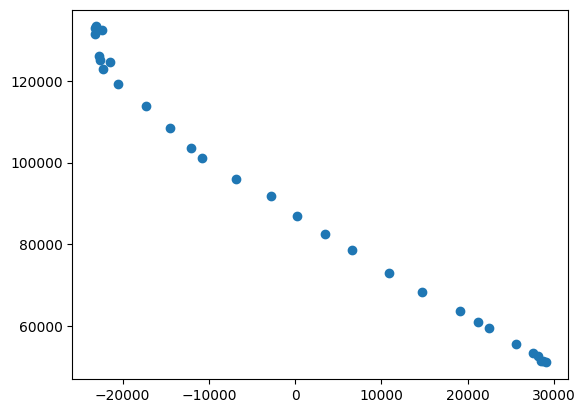

In [20]:
plt.scatter(x=pca.fit_transform(X), y=y)

In [21]:
lr1 = LinearRegression()
lr1.fit(pca.fit_transform(X), y)

LinearRegression()

In [22]:
y_pred = lr1.predict(pca.fit_transform(X))

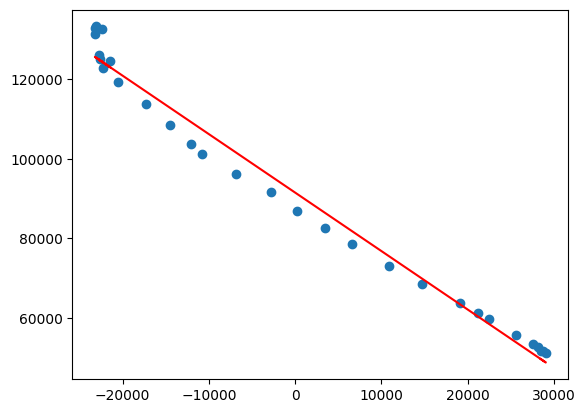

In [23]:
plt.scatter(x=pca.fit_transform(X), y=y)
plt.plot(pca.fit_transform(X), y_pred, c='red')

In [24]:
X = df.drop(columns=['ch4emission']).values
y = df['ch4emission'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [26]:
# feature selection using Lasso
alphas = {}
r2s = {}
mses = {}
for i in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    alphas[i] = list(lasso.coef_)

    y_pred = lasso.predict(X_test)
    r2s[i] = r2_score(y_test, y_pred)

    mses[i] = mean_squared_error(y_test, y_pred)

In [27]:
comp = pd.DataFrame(alphas).T
comp.columns = df.drop(columns=['ch4emission']).columns

comp['r2'] = r2s

<Axes: >

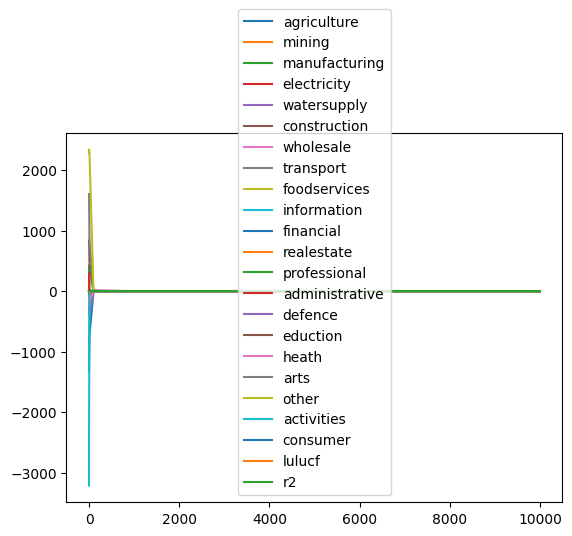

In [36]:
comp.plot(kind='line')

In [29]:
comp

,agriculture,mining,manufacturing,electricity,watersupply,construction,wholesale,transport,foodservices,information,...,administrative,defence,eduction,heath,arts,other,activities,consumer,lulucf,r2
0.001,1.559177,1.644382,-10.641616,1.369900,0.695351,-302.886161,-192.400371,14.072841,275.714732,-897.530222,...,289.546201,-208.696069,840.971937,-222.793969,1609.159304,2284.120302,-3211.274357,-3.952818,-6.290047,0.996044
0.010,1.559487,1.644531,-10.634139,1.369954,0.695462,-302.819199,-192.374770,14.078399,276.126113,-896.454926,...,288.964910,-209.130707,840.900222,-222.650888,1608.979449,2284.723100,-3202.366466,-3.952010,-6.291197,0.996055
0.100,1.562732,1.645985,-10.559559,1.370534,0.696577,-302.160250,-192.121565,14.135057,280.210572,-885.672483,...,283.137470,-213.461573,840.174798,-221.222856,1607.138533,2290.678617,-3113.038648,-3.943821,-6.301282,0.996165
1.000,1.604842,1.658127,-9.831744,1.378604,0.707946,-296.694099,-189.828572,14.783061,319.764956,-775.722757,...,223.662362,-255.582417,832.268848,-206.759210,1584.812082,2344.067453,-2205.204937,-3.845887,-6.313848,0.997125
10.000,1.776049,1.787077,-10.520018,2.096393,0.791337,-221.089680,-184.875768,20.041738,312.015979,-344.420798,...,-234.590878,-391.930161,478.594307,-163.226180,831.802289,2287.244109,0.000000,-0.351034,-8.573072,0.998585
100.000,0.962482,0.924416,1.994948,0.929430,1.002156,0.000000,20.069077,1.567311,-0.000000,0.000000,...,0.000000,4.849788,0.000000,0.000000,0.000000,0.000000,0.000000,1.472315,2.623076,0.999969
1000.000,1.024385,1.024340,0.000000,1.063798,0.999490,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.777278,-0.000000,0.999994
10000.000,1.048466,1.117045,0.000000,0.911969,0.996212,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.999931
